## Summary
This file is for coding to clean and visualize the data to prepare for the unsupervised learning.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import miceforest as mf
data_abm = pd.read_csv('abm.csv')
data_card = pd.read_csv('card.csv')
data_eft = pd.read_csv('eft.csv')
data_emt = pd.read_csv('emt.csv')
data_kyc = pd.read_csv('kyc.csv')
data_wire = pd.read_csv('wire.csv')
data_kyc_industry_codes = pd.read_csv('kyc_industry_codes.csv')

# Prepare the dataset
## Null value
We first count null value each column.


In [3]:

def replace_other_with_null(dataset):
    dataset = dataset.replace('other', np.nan)  # Replace 'other' with NaN
    return dataset
# Apply the function to each dataset
data_abm = replace_other_with_null(data_abm)
data_card = replace_other_with_null(data_card)
data_kyc = replace_other_with_null(data_kyc)
data_kyc_industry_codes = replace_other_with_null(data_kyc_industry_codes)
data_emt = replace_other_with_null(data_emt)
data_wire = replace_other_with_null(data_wire)
data_eft = replace_other_with_null(data_eft)

print(data_abm.isnull().sum()/len(data_abm))
print(data_card.isnull().sum()/len(data_card))
print(data_eft.isnull().sum()/len(data_eft))
print(data_emt.isnull().sum()/len(data_emt))
print(data_kyc.isnull().sum()/len(data_kyc))
print(data_wire.isnull().sum()/len(data_wire))
print(data_kyc_industry_codes.isnull().sum()/len(data_kyc_industry_codes))





abm_id              0.000000
customer_id         0.000000
amount_cad          0.000000
debit_credit        0.000000
cash_indicator      0.000000
country             0.185506
province            0.416227
city                0.416227
transaction_date    0.000000
transaction_time    0.000000
dtype: float64
card_trxn_id         0.000000
customer_id          0.000000
amount_cad           0.000000
debit_credit         0.000000
merchant_category    0.173314
ecommerce_ind        0.000000
country              0.378131
province             0.390205
city                 0.517976
transaction_date     0.000000
transaction_time     0.000000
dtype: float64
eft_id              0.0
customer_id         0.0
amount_cad          0.0
debit_credit        0.0
transaction_date    0.0
transaction_time    0.0
dtype: float64
emt_id              0.0
customer_id         0.0
amount_cad          0.0
debit_credit        0.0
transaction_date    0.0
transaction_time    0.0
dtype: float64
customer_id         0.000000
cou

We should use the multiple impute to predict the missing value of the location in the dataset abm, card and kyc. 

In [4]:
# Function to encode categorical columns and perform multiple imputation
def impute_missing_values(dataset, columns_to_impute):
    # Convert categorical columns to numerical using category codes
    data_for_imputing = dataset.copy()
    dataset_categorical_codes ={} 
    dataset_categorical_categories = {}
    for column in columns_to_impute:
        dataset_categorical_codes[column] = data_for_imputing[column].astype('category').cat.codes
        dataset_categorical_categories[column] = data_for_imputing[column].astype('category').cat.categories
        dataset[column] =dataset_categorical_codes[column]
        dataset[column].replace(-1, np.nan, inplace=True)  # Ensure NaN for missing values

    # Initialize the kernel for miceforest
    kernel = mf.ImputationKernel(
        dataset[columns_to_impute],
        save_all_iterations=True,
        random_state=42
    )

    # Perform multiple imputations
    kernel.mice(5)  # Perform 5 multiple imputation iterations
    imputed_data = kernel.complete_data(dataset=0)
    # Convert numerical encodings back to original categories
    for column in columns_to_impute:
        # Ensure the column is treated as categorical
        dataset[column] = pd.Categorical.from_codes(
            codes=imputed_data[column].round().astype(int),  # Ensure integer codes
            categories=dataset_categorical_categories[column]  # Use original categories
        )
    return dataset


# Specify columns to impute
columns_to_impute = ['city', 'province', 'country']

# Perform imputation on each dataset
print("Imputing data_abm...")
data_abm_imputed = impute_missing_values(data_abm, columns_to_impute)

print("Imputing data_card...")
data_card_imputed = impute_missing_values(data_card, columns_to_impute)

print("Imputing data_kyc...")
data_kyc_imputed = impute_missing_values(data_kyc, columns_to_impute)


Imputing data_abm...
Imputing data_card...
Imputing data_kyc...


In [5]:
print(data_abm.head())

                 abm_id       customer_id  amount_cad debit_credit  \
0  ABM00000000000000006  SYNCID0000000014       25.41       credit   
1  ABM00000000000000008  SYNCID0000000034      238.17        debit   
2  ABM00000000000000009  SYNCID0000000034     1655.43       credit   
3  ABM00000000000000010  SYNCID0000000034      620.69       credit   
4  ABM00000000000000011  SYNCID0000000034      323.70        debit   

   cash_indicator country province        city transaction_date  \
0           False      CA       SK      REGINA       2022-11-16   
1            True      CA       ON     TORONTO       2022-11-18   
2           False      CA       AB    EDMONTON       2022-12-29   
3            True      CA       AB     CALGARY       2023-01-22   
4            True      CA       ON  WOODBRIDGE       2022-11-14   

  transaction_time  
0         17:37:41  
1         10:22:59  
2         11:56:08  
3         16:48:12  
4         13:24:45  


In [6]:
data_abm_imputed.to_csv('data_abm_imputed.csv', index=False)
data_card_imputed.to_csv('data_card_imputed.csv', index=False)
data_kyc_imputed.to_csv('data_kyc_imputed.csv', index=False)


In [7]:
print(data_abm_imputed.isnull().sum()/len(data_abm_imputed))

abm_id              0.0
customer_id         0.0
amount_cad          0.0
debit_credit        0.0
cash_indicator      0.0
country             0.0
province            0.0
city                0.0
transaction_date    0.0
transaction_time    0.0
dtype: float64


In [8]:
print(data_card_imputed.isnull().sum()/len(data_card_imputed))



card_trxn_id         0.000000
customer_id          0.000000
amount_cad           0.000000
debit_credit         0.000000
merchant_category    0.173314
ecommerce_ind        0.000000
country              0.000000
province             0.000000
city                 0.000000
transaction_date     0.000000
transaction_time     0.000000
dtype: float64


fill in null values in the merchant_category column

In [9]:
def fill_merchant_category_based_on_distribution(dataset, column_name):
    # Analyze the distribution of non-null values
    non_null_values = dataset[column_name].dropna().astype(int)
    value_counts = non_null_values.value_counts(normalize=True)  # Get proportions
    # print(f"Value distribution for '{column_name}':\n{value_counts}")

    # Generate random values based on the distribution for null entries
    if dataset[column_name].isna().sum() > 0:
        # Sample from the value distribution
        random_values = np.random.choice(
            value_counts.index, 
            size=dataset[column_name].isna().sum(), 
            p=value_counts.values
        )
        # Assign the sampled values to the null entries
        dataset.loc[dataset[column_name].isna(), column_name] = random_values

    return dataset

# Fill the null values in the 'merchant_category' column based on the distribution
data_card_imputed = fill_merchant_category_based_on_distribution(data_card_imputed, 'merchant_category')
print(data_card_imputed.isnull().sum())

card_trxn_id         0
customer_id          0
amount_cad           0
debit_credit         0
merchant_category    0
ecommerce_ind        0
country              0
province             0
city                 0
transaction_date     0
transaction_time     0
dtype: int64


In [10]:

print(data_kyc_imputed.isnull().sum()/len(data_kyc_imputed))
data_kyc_imputed = fill_merchant_category_based_on_distribution(data_kyc_imputed, 'industry_code')
data_kyc_imputed = fill_merchant_category_based_on_distribution(data_kyc_imputed, 'employee_count')

customer_id         0.000000
country             0.000000
province            0.000000
city                0.000000
industry_code       0.142910
employee_count      0.149985
sales               0.109997
established_date    0.149985
onboard_date        0.159951
dtype: float64


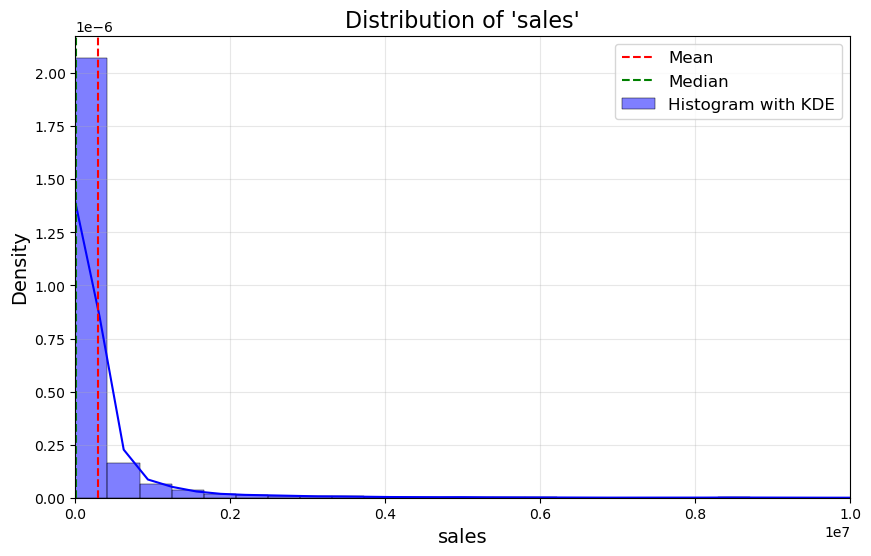

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_column_distribution(dataset, column_name):
    # Drop null values for analysis
    column_data = dataset[column_name].dropna()

    # Plot histogram and KDE
    plt.figure(figsize=(10, 6))
    sns.histplot(column_data, kde=True, bins=150, color='blue', stat="density", label='Histogram with KDE')
    plt.axvline(column_data.mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
    plt.axvline(column_data.median(), color='green', linestyle='dashed', linewidth=1.5, label='Median')
    plt.title(f"Distribution of '{column_name}'", fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.xlim(0, 10000000)  # Set x-axis range to 0-10000
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# Plot the distribution of the 'merchant_category' column
plot_column_distribution(data_kyc_imputed, 'sales')

In [12]:
data_kyc_imputed=fill_merchant_category_based_on_distribution(data_kyc_imputed,'sales')

In [13]:
data_kyc_imputed['onboard_date'] = pd.to_datetime(data_kyc['onboard_date'], errors='coerce')
data_kyc_imputed['established_date'] = pd.to_datetime(data_kyc['established_date'], errors='coerce')

data_kyc_imputed['duration'] = data_kyc.apply(
    lambda row: (row['onboard_date'] - row['established_date']).days 
    if pd.notnull(row['onboard_date']) and pd.notnull(row['established_date']) 
    else None, 
    axis=1
)



In [14]:
data_kyc_imputed['duration'].isnull().sum()/len(data_kyc_imputed['duration'])

0.28422023992617657

In [15]:
data_kyc_imputed = fill_merchant_category_based_on_distribution(data_kyc_imputed, 'duration')
data_kyc_imputed.drop(columns=['onboard_date', 'established_date'], inplace=True)


In [16]:
data_abm_imputed.to_csv('data_abm_imputed.csv', index=False)
data_card_imputed.to_csv('data_card_imputed.csv', index=False)
data_kyc_imputed.to_csv('data_kyc_imputed.csv', index=False)



In [91]:
data_abm_imputed = pd.read_csv('data_abm_imputed.csv')

## Encoding data

In [43]:
# One_hot_dot encoder
def one_hot_encoder(dataset, column):
    dataset_copy=dataset.copy()
    Oh_encoder = OneHotEncoder(sparse=False, drop=None)  
    encoded_data = Oh_encoder.fit_transform(dataset_copy[[column]])
    encoded_data_frame = pd.DataFrame(encoded_data, columns=Oh_encoder.get_feature_names_out([column]))
    dataset_copy= dataset_copy.drop(columns=[column])
    dataset_copy = pd.concat([dataset_copy, encoded_data_frame], axis=1)
    return dataset_copy




In [44]:
# Label encoder
def encode_with_label_encoder(dataset,column):
    dataset_copy = dataset.copy()
    label_encoder = LabelEncoder()
    encoded_data = label_encoder.fit_transform(dataset_copy[column])
    encoded_data_dataframe = pd.DataFrame(encoded_data, columns=[column])
    dataset_copy = dataset_copy.drop(columns=[column])
    dataset_copy = pd.concat([dataset_copy, encoded_data_dataframe], axis=1)
    return dataset_copy


In [90]:
def time_encoder(dataset, column1, column2):
    dataset_copy= dataset.copy()
    time_date = pd.to_datetime(dataset_copy[column1], format='%Y-%m-%d')
    time_accurate = pd.to_datetime(dataset_copy[column2], format='%H:%M:%S')
    date = time_date.dt.day
    month = time_date.dt.month
    year = time_date.dt.year
    hour = time_accurate.dt.hour
    minute = time_accurate.dt.minute
    second = time_accurate.dt.second
    print(date.type())
    date_dataframe=date.to_frame(name = column1+'date')
    month_dataframe = month.to_frame(name = column1 + 'month')
    year_dataframe = year.to_frame(name = column1 + 'year')
    hour_dataframe=hour.to_frame(name = column2+'hour')
    minute_dataframe = minute.to_frame(name = column2 + 'minute')
    second_dataframe = second.to_frame(name = column2 + 'second')
    dataset_copy=dataset_copy.drop(columns = [column1])
    dataset_copy=dataset_copy.drop(columns = [column2])
    dataset_copy = pd.concat([dataset_copy, date_dataframe, month_dataframe, year_dataframe, hour_dataframe, minute_dataframe, second_dataframe], axis=1)
    return dataset_copy

In [92]:

data_abm_imputed_encoded= one_hot_encoder(data_abm_imputed, 'cash_indicator')
data_abm_imputed_encoded= one_hot_encoder(data_abm_imputed_encoded, 'debit_credit')

/home/chenqis4/anaconda3/envs/train_network/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/chenqis4/anaconda3/envs/train_network/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
data_abm_imputed_encoded.head()


,abm_id,customer_id,amount_cad,country,province,city,cash_indicator_False,cash_indicator_True,debit_credit_credit,debit_credit_debit,transaction_datedate,transaction_datemonth,transaction_dateyear,transaction_timehour,transaction_timeminute,transaction_timesecond
0,ABM00000000000000006,SYNCID0000000014,25.41,CA,SK,REGINA,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,ABM00000000000000008,SYNCID0000000034,238.17,CA,ON,TORONTO,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,ABM00000000000000009,SYNCID0000000034,1655.43,CA,AB,EDMONTON,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,ABM00000000000000010,SYNCID0000000034,620.69,CA,AB,CALGARY,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,ABM00000000000000011,SYNCID0000000034,323.70,CA,ON,WOODBRIDGE,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:

data_abm_imputed_encoded = encode_with_label_encoder(data_abm_imputed_encoded, 'abm_id')
data_abm_imputed_encoded = encode_with_label_encoder(data_abm_imputed_encoded, 'customer_id')
data_abm_imputed_encoded = encode_with_label_encoder(data_abm_imputed_encoded, 'city')
data_abm_imputed_encoded = encode_with_label_encoder(data_abm_imputed_encoded, 'province')
data_abm_imputed_encoded = encode_with_label_encoder(data_abm_imputed_encoded, 'country')

In [93]:
data_abm_imputed_encoded = time_encoder(data_abm_imputed_encoded, 'transaction_date', 'transaction_time')

AttributeError: 'Series' object has no attribute 'type'